# Practice Geopandas Gis Introduction

## Import librarires

In [1]:
import zipfile, io
import urllib
import requests
import os 
import matplotlib
import matplotlib.pyplot as plt
import warnings
import geopandas as gpd
import pandas as pd
warnings.simplefilter("ignore")

In [132]:
province = gpd.read_file('./Limiti01012022/ProvCM01012022/ProvCM01012022_WGS84.shp')
print("File Type: ",type(province))

File Type:  <class 'geopandas.geodataframe.GeoDataFrame'>


In [133]:
province.head(3)

,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,SHAPE_AREA,Shape_Leng,geometry
0,1,1,1,201,201,-,Torino,Torino,TO,Citta metropolitana,6.826908e+09,593389.667001,"POLYGON ((411015.006 5049970.983, 411070.006 5..."
1,1,1,2,0,2,Vercelli,-,Vercelli,VC,Provincia,2.081602e+09,458754.449021,"POLYGON ((437900.552 5088796.204, 437915.021 5..."
2,1,1,3,0,3,Novara,-,Novara,NO,Provincia,1.340250e+09,276722.284585,"POLYGON ((459146.367 5079451.275, 459180.648 5..."


In [134]:
province.DEN_PROV.unique()

array(['-', 'Vercelli', 'Novara', 'Cuneo', 'Asti', 'Alessandria', 'Aosta',
       'Imperia', 'Savona', 'La Spezia', 'Varese', 'Como', 'Sondrio',
       'Bergamo', 'Brescia', 'Pavia', 'Cremona', 'Mantova', 'Bolzano',
       'Trento', 'Verona', 'Vicenza', 'Belluno', 'Treviso', 'Padova',
       'Rovigo', 'Udine', 'Gorizia', 'Trieste', 'Piacenza', 'Parma',
       "Reggio nell'Emilia", 'Modena', 'Ferrara', 'Ravenna',
       "Forli'-Cesena", 'Pesaro e Urbino', 'Ancona', 'Macerata',
       'Ascoli Piceno', 'Massa Carrara', 'Lucca', 'Pistoia', 'Livorno',
       'Pisa', 'Arezzo', 'Siena', 'Grosseto', 'Perugia', 'Terni',
       'Viterbo', 'Rieti', 'Latina', 'Frosinone', 'Caserta', 'Benevento',
       'Avellino', 'Salerno', "L'Aquila", 'Teramo', 'Pescara', 'Chieti',
       'Campobasso', 'Foggia', 'Taranto', 'Brindisi', 'Lecce', 'Potenza',
       'Matera', 'Cosenza', 'Catanzaro', 'Trapani', 'Agrigento',
       'Caltanissetta', 'Enna', 'Ragusa', 'Siracusa', 'Sassari', 'Nuoro',
       'Pordenone', '

Province: Pisa


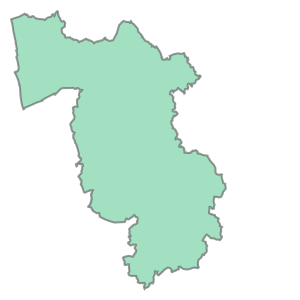

In [135]:
# Plot Random Province
# Each time you run the script you will plot a "random" province


random_index = random.choice(province.index)

random_name = province.loc[random_index,'DEN_PROV']

print(f"Province: {random_name}")
province.geometry[random_index]

In [28]:
municipalities = gpd.read_file('./Limiti01012022/Com01012022/Com01012022_WGS84.shp')
print("File Type: ",type(municipalities))

File Type:  <class 'geopandas.geodataframe.GeoDataFrame'>


In [43]:
mun_len = len(municipalities.COMUNE.unique())
mun_len

7898

In [42]:
municipalities.shape

(7904, 13)

In [46]:
municipalities.columns

Index(['COD_RIP', 'COD_REG', 'COD_PROV', 'COD_CM', 'COD_UTS', 'PRO_COM',
       'PRO_COM_T', 'COMUNE', 'COMUNE_A', 'CC_UTS', 'Shape_Area', 'Shape_Leng',
       'geometry'],
      dtype='object')

In [57]:
Biggest5areas = municipalities.sort_values(by='Shape_Area',ascending=False).head(5)
Smallest5areas = municipalities.sort_values(by='Shape_Area',ascending=False).tail(5)

print(f"Biggest five areas by municipalities: \n\n{Biggest5areas.COMUNE} ")
print(f"Smallest five areas by municipalities: \n\n{Smallest5areas.COMUNE} ")

Biggest five areas by municipalities: 

1060         Roma
5076      Ravenna
6581    Cerignola
7579         Noto
7188      Sassari
Name: COMUNE, dtype: object 
Smallest five areas by municipalities: 

7495        Roccafiorita
5756    Conca dei Marini
3722    Fiorano al Serio
1333           Miagliano
6973              Atrani
Name: COMUNE, dtype: object 


Municipality: Sadali


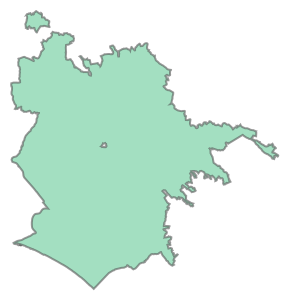

In [73]:
# Plot Random municipality
# Each time you run the script you will plot a "random" municipality


random_index = random.choice(municipalities.index)

random_name = municipalities.loc[random_index,'COMUNE']

print(f"Municipality: {random_name}")
municipalities.geometry[random_index]

In [75]:
# Get the centroids of each municipality

municipalities.centroid

0       POINT (414253.041 5039520.917)
1       POINT (394197.395 5030810.769)
2       POINT (360808.802 4990103.710)
3       POINT (375721.501 4997293.647)
4       POINT (388609.911 5029096.062)
                     ...              
7899    POINT (719929.305 5081259.783)
7900    POINT (665745.667 5118569.601)
7901    POINT (498495.031 5026399.375)
7902    POINT (688542.281 5132247.334)
7903    POINT (525030.642 5099130.845)
Length: 7904, dtype: geometry

In [118]:
province_trento =province[province['DEN_UTS']=='Trento']
province_trento


,COD_RIP,COD_REG,COD_PROV,COD_CM,COD_UTS,DEN_PROV,DEN_CM,DEN_UTS,SIGLA,TIPO_UTS,SHAPE_AREA,Shape_Leng,geometry
21,2,4,22,0,22,Trento,-,Trento,TN,Provincia autonoma,6206864080.25,642828.097848,"POLYGON ((716619.2510000002 5156007.8039, 7166..."
DEN_PROV,Trento,Trento,Trento,Trento,Trento,Trento,Trento,Trento,Trento,Trento,Trento,Trento,Trento


In [126]:
municipalities_trento = municipalities[municipalities['COD_PROV']==22]
print(f"Count of municipalities of trento: {municipalities_trento.shape[0]}")

Count of municipalities of trento: 166


In [128]:
municipalities.representative_point()

0       POINT (414619.671 5039576.062)
1       POINT (394241.802 5030846.871)
2       POINT (358928.313 4989099.924)
3       POINT (375834.820 4997468.616)
4       POINT (388750.496 5029064.133)
                     ...              
7899    POINT (719745.920 5082010.698)
7900    POINT (666600.295 5118698.956)
7901    POINT (498554.534 5026367.169)
7902    POINT (688262.225 5132717.345)
7903    POINT (524640.999 5099282.131)
Length: 7904, dtype: geometry

In [130]:
municipalities.to_crs(epsg=4326).to_file('municipalities.geojson', driver='GeoJSON')



In [136]:
province.to_crs(epsg=4326).to_file('mprovince.geojson', driver='GeoJSON')